In [1]:
##Importing Packages 
import qiskit 
from qiskit import Aer, QuantumCircuit, execute
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [2]:
#Loading IBMQ Account
IBMQ.save_account('(INSERT IBMQ USER TOKEN HERE)', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


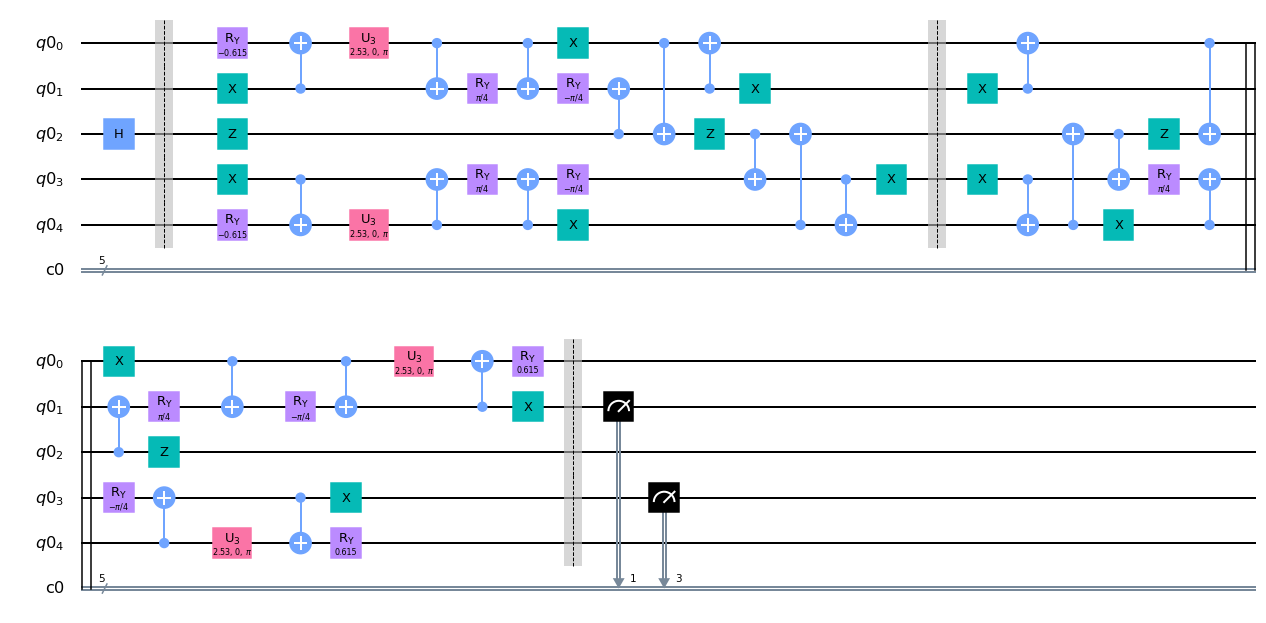

In [3]:
#BASIC GATES, NO ERROR

##Build the Circuit and Visualize   
##error operator is the Hadamard gate

t = np.arcsin(np.sqrt(1/3)) #t=theta/2
a = np.pi/4
b = np.pi-t

#Init Circuit
q = QuantumRegister(5)
c = ClassicalRegister(5)
qcb = QuantumCircuit(q, c)

#INITIALIZING ARBITRARY QUBIT
qcb.h(q[2])
qcb.barrier()

#BASIC ENCODING#
qcb.ry(-t,q[0])
qcb.x(q[1])
qcb.cx(q[1], q[0])
qcb.u3(b,0,np.pi,q[0])
qcb.cx(q[0],q[1])
qcb.ry(a,q[1])
qcb.cx(q[0],q[1])
qcb.x(q[0])
qcb.ry(-a,q[1])
qcb.z(q[2])
qcb.cx(q[2],q[1])
qcb.cx(q[0],q[2])
qcb.cx(q[1],q[0])
qcb.x(q[1])

qcb.ry(-t,q[4]) 
qcb.x(q[3])
qcb.cx(q[3], q[4])
qcb.u3(b,0,np.pi,q[4])
qcb.cx(q[4],q[3])
qcb.ry(a,q[3])
qcb.cx(q[4],q[3])
qcb.x(q[4])
qcb.ry(-a,q[3])
qcb.z(q[2])
qcb.cx(q[2],q[3])
qcb.cx(q[4],q[2])
qcb.cx(q[3],q[4])
qcb.x(q[3])

##error operator##

qcb.barrier()

#BASIC DECODING#
qcb.x(q[3])
qcb.cx(q[3],q[4])
qcb.cx(q[4],q[2])
qcb.cx(q[2],q[3])
qcb.z(q[2])
qcb.ry(a,q[3])
qcb.x(q[4])
qcb.cx(q[4],q[3])
qcb.ry(-a,q[3])
qcb.cx(q[4],q[3])
qcb.u3(b,0,np.pi,q[4])
qcb.cx(q[3], q[4])
qcb.x(q[3])
qcb.ry(t,q[4])

qcb.x(q[1])
qcb.cx(q[1],q[0])
qcb.cx(q[0],q[2])
qcb.cx(q[2],q[1])
qcb.z(q[2])
qcb.ry(a,q[1])
qcb.x(q[0])
qcb.cx(q[0],q[1])
qcb.ry(-a,q[1])
qcb.cx(q[0],q[1])
qcb.u3(b,0,np.pi,q[0])
qcb.cx(q[1], q[0])
qcb.x(q[1])
qcb.ry(t,q[0])

#measurement
qcb.barrier()
#qcb.measure(q[0],c[0])
qcb.measure(q[1],c[1])
qcb.measure(q[3],c[3])
#qcb.measure(q[4],c[4])

qcb.draw()
qcb.draw(output="mpl")

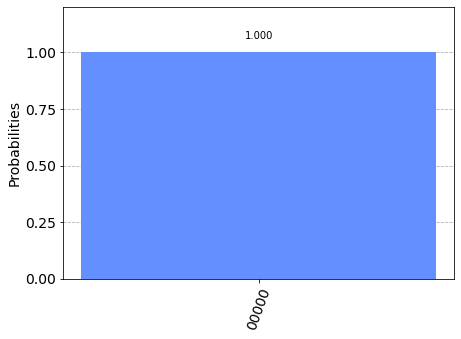

In [4]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
resultbsim = execute(qcb, backend=simulator).result()
countsbsim = resultbsim.get_counts(qcb)
plot_histogram(resultbsim.get_counts(qcb))

In [5]:
#3 Different Runs on Melbourne
machine = provider.get_backend('ibmq_16_melbourne')
jobb = execute(qcb, backend=machine, shots=8192)
resultb = jobb.result()
countsb=resultb.get_counts(qcb)
jobb2 = execute(qcb, backend=machine, shots=8192)
resultb2 = jobb2.result()
countsb2=resultb2.get_counts(qcb)
jobb3 = execute(qcb, backend=machine, shots=8192)
resultb3 = jobb3.result()
countsb3=resultb3.get_counts(qcb)

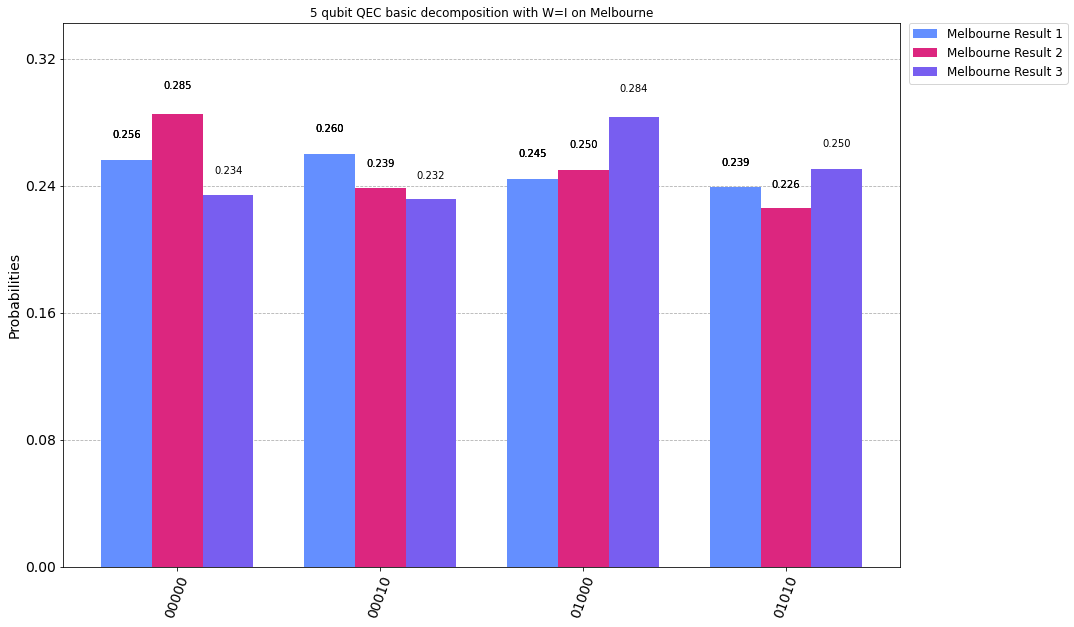

In [6]:
legend=['Melbourne Result 1','Melbourne Result 2', 'Melbourne Result 3']
plot_histogram([countsb, countsb2, countsb3], legend=legend,title='5 qubit QEC basic decomposition with W=I on Melbourne',figsize=(15,10))

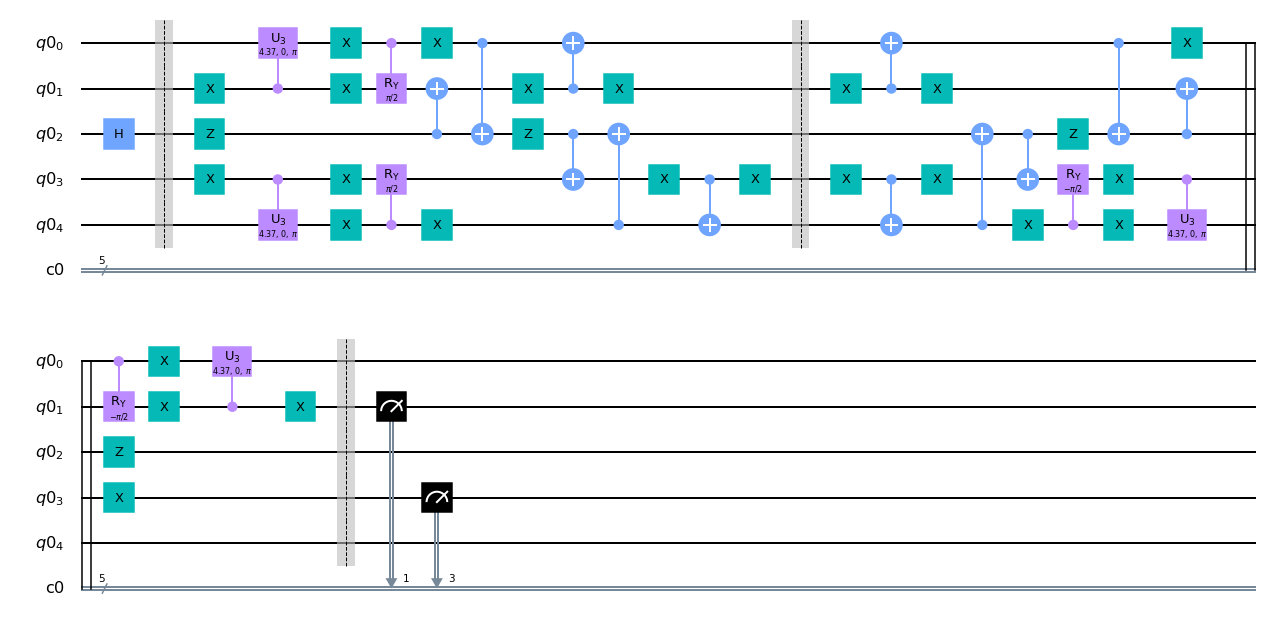

In [7]:
#STANDARD GATES, NO ERROR
qcs = QuantumCircuit(q, c)

#INITIALIZING ARBITRARY QUBIT
qcs.h(q[2])
qcs.barrier()

##STANDARD ENCODING##
qcs.x(q[1])
qcs.cu3(np.pi+t+t,0,np.pi,q[1],q[0])
qcs.x(q[1])
qcs.x(q[0])
qcs.cry(np.pi/2,q[0],q[1])
qcs.x(q[0])
qcs.z(q[2])
qcs.cx(q[2],q[1])
qcs.cx(q[0],q[2])
qcs.x(q[1])
qcs.cx(q[1],q[0])
qcs.x(q[1])

qcs.x(q[3])
qcs.cu3(np.pi+t+t,0,np.pi,q[3],q[4])
qcs.x(q[3])
qcs.x(q[4])
qcs.cry(np.pi/2,q[4],q[3])
qcs.x(q[4])
qcs.z(q[2])
qcs.cx(q[2],q[3])
qcs.cx(q[4],q[2])
qcs.x(q[3])
qcs.cx(q[3],q[4])
qcs.x(q[3])

##error operator##

qcs.barrier()

#STANDARD DECODING#

qcs.x(q[3])
qcs.cx(q[3],q[4])
qcs.x(q[3])
qcs.cx(q[4],q[2])
qcs.cx(q[2],q[3])
qcs.z(q[2])
qcs.x(q[4])
qcs.cry(-np.pi/2,q[4],q[3])
qcs.x(q[4])
qcs.x(q[3])
qcs.cu3(np.pi+t+t,0,np.pi,q[3],q[4])
qcs.x(q[3])

qcs.x(q[1])
qcs.cx(q[1],q[0])
qcs.x(q[1])
qcs.cx(q[0],q[2])
qcs.cx(q[2],q[1])
qcs.z(q[2])
qcs.x(q[0])
qcs.cry(-np.pi/2,q[0],q[1])
qcs.x(q[0])
qcs.x(q[1])
qcs.cu3(np.pi+t+t,0,np.pi,q[1],q[0])
qcs.x(q[1])

#measurement
qcs.barrier()
#qcs.measure(q[0],c[0])
qcs.measure(q[1],c[1])
qcs.measure(q[3],c[3])
#qcs.measure(q[4],c[4])

qcs.draw()
qcs.draw(output="mpl")

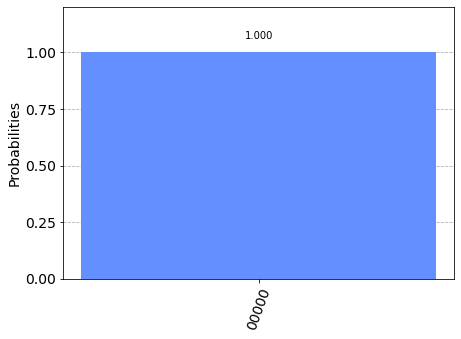

In [8]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
resultssim = execute(qcs, backend=simulator).result()
countsssim = resultssim.get_counts(qcs)
plot_histogram(resultssim.get_counts(qcs))

In [9]:
#3 Different Runs on Melbourne
machine = provider.get_backend('ibmq_16_melbourne')
jobs = execute(qcs, backend=machine, shots=8192)
results = jobs.result()
countss=results.get_counts(qcs)
jobs2 = execute(qcs, backend=machine, shots=8192)
results2 = jobs2.result()
countss2=results2.get_counts(qcs)
jobs3 = execute(qcs, backend=machine, shots=8192)
results3 = jobs3.result()
countss3=results3.get_counts(qcs)

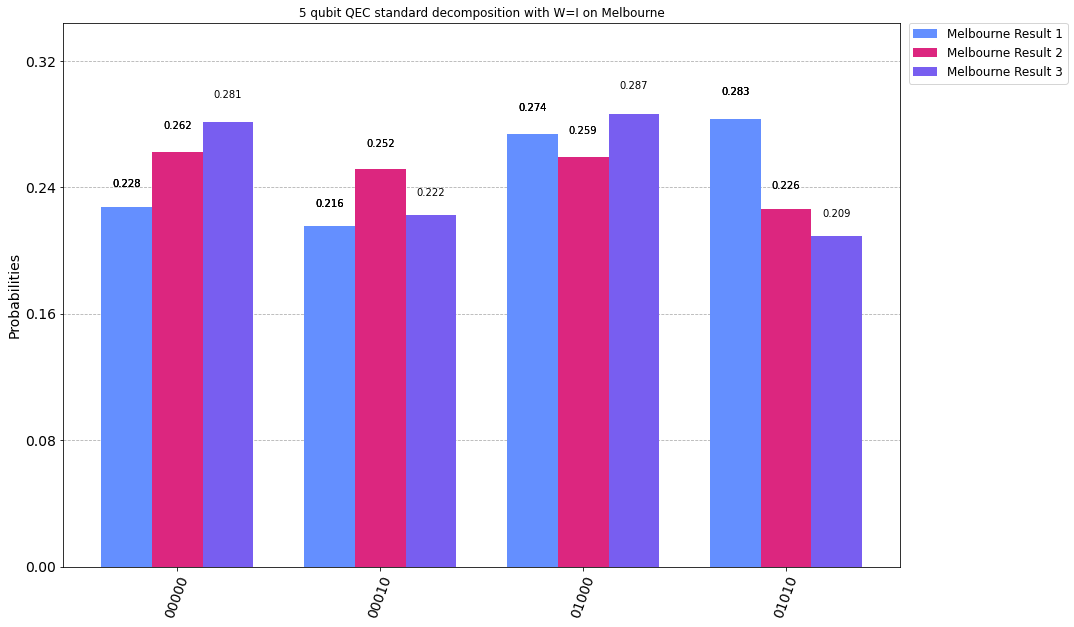

In [10]:
legend=['Melbourne Result 1','Melbourne Result 2','Melbourne Result 3']
plot_histogram([countss, countss2,countss3], legend=legend,title='5 qubit QEC standard decomposition with W=I on Melbourne',figsize=(15,10))

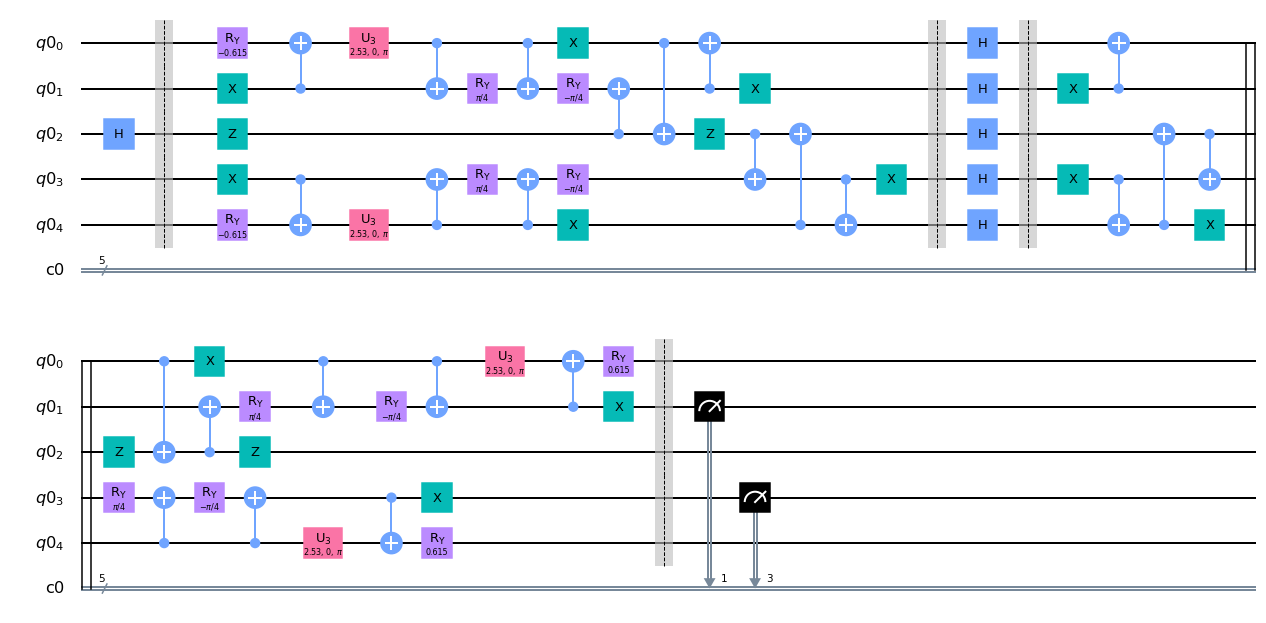

In [11]:
#BASIC GATES, H Error

#Init Circuit
qcbh = QuantumCircuit(q, c)

#INITIALIZING ARBITRARY QUBIT
qcbh.h(q[2])
qcbh.barrier()

#BASIC ENCODING#
qcbh.ry(-t,q[0])
qcbh.x(q[1])
qcbh.cx(q[1], q[0])
qcbh.u3(b,0,np.pi,q[0])
qcbh.cx(q[0],q[1])
qcbh.ry(a,q[1])
qcbh.cx(q[0],q[1])
qcbh.x(q[0])
qcbh.ry(-a,q[1])
qcbh.z(q[2])
qcbh.cx(q[2],q[1])
qcbh.cx(q[0],q[2])
qcbh.cx(q[1],q[0])
qcbh.x(q[1])

qcbh.ry(-t,q[4]) 
qcbh.x(q[3])
qcbh.cx(q[3], q[4])
qcbh.u3(b,0,np.pi,q[4])
qcbh.cx(q[4],q[3])
qcbh.ry(a,q[3])
qcbh.cx(q[4],q[3])
qcbh.x(q[4])
qcbh.ry(-a,q[3])
qcbh.z(q[2])
qcbh.cx(q[2],q[3])
qcbh.cx(q[4],q[2])
qcbh.cx(q[3],q[4])
qcbh.x(q[3])

##error operator##
qcbh.barrier()

qcbh.h(q[0])
qcbh.h(q[1])
qcbh.h(q[2])
qcbh.h(q[3])
qcbh.h(q[4])

qcbh.barrier()

#BASIC DECODING#
qcbh.x(q[3])
qcbh.cx(q[3],q[4])
qcbh.cx(q[4],q[2])
qcbh.cx(q[2],q[3])
qcbh.z(q[2])
qcbh.ry(a,q[3])
qcbh.x(q[4])
qcbh.cx(q[4],q[3])
qcbh.ry(-a,q[3])
qcbh.cx(q[4],q[3])
qcbh.u3(b,0,np.pi,q[4])
qcbh.cx(q[3], q[4])
qcbh.x(q[3])
qcbh.ry(t,q[4])

qcbh.x(q[1])
qcbh.cx(q[1],q[0])
qcbh.cx(q[0],q[2])
qcbh.cx(q[2],q[1])
qcbh.z(q[2])
qcbh.ry(a,q[1])
qcbh.x(q[0])
qcbh.cx(q[0],q[1])
qcbh.ry(-a,q[1])
qcbh.cx(q[0],q[1])
qcbh.u3(b,0,np.pi,q[0])
qcbh.cx(q[1], q[0])
qcbh.x(q[1])
qcbh.ry(t,q[0])

#measurement
qcbh.barrier()
#qcbh.measure(q[0],c[0])
qcbh.measure(q[1],c[1])
qcbh.measure(q[3],c[3])
#qcbh.measure(q[4],c[4])

qcbh.draw()
qcbh.draw(output="mpl")

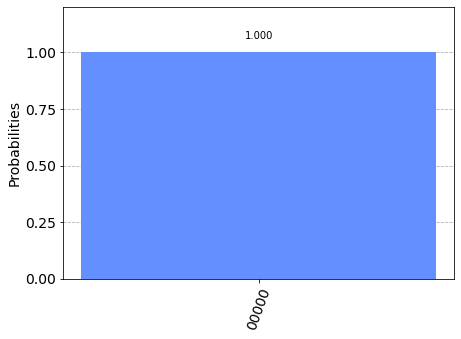

In [12]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
resultbhsim = execute(qcbh, backend=simulator).result()
countsbhsim = resultbhsim.get_counts(qcbh)
plot_histogram(resultbhsim.get_counts(qcbh))

In [13]:
#3 Different Runs on Melbourne
machine = provider.get_backend('ibmq_16_melbourne')
jobbh = execute(qcbh, backend=machine, shots=8192)
resultbh = jobbh.result()
countsbh=resultbh.get_counts(qcbh)
jobbh2 = execute(qcbh, backend=machine, shots=8192)
resultbh2 = jobbh2.result()
countsbh2=resultbh2.get_counts(qcbh)
jobbh3 = execute(qcbh, backend=machine, shots=8192)
resultbh3 = jobbh3.result()
countsbh3=resultbh3.get_counts(qcbh)

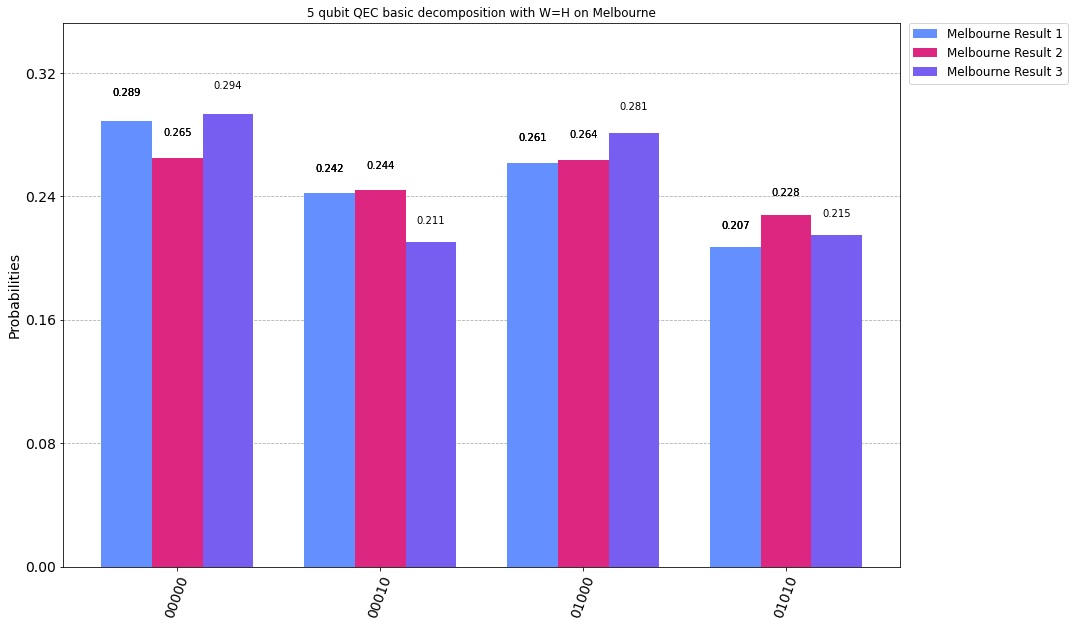

In [14]:
legend=['Melbourne Result 1','Melbourne Result 2', 'Melbourne Result 3']
plot_histogram([countsbh, countsbh2, countsbh3], legend=legend,title='5 qubit QEC basic decomposition with W=H on Melbourne',figsize=(15,10))

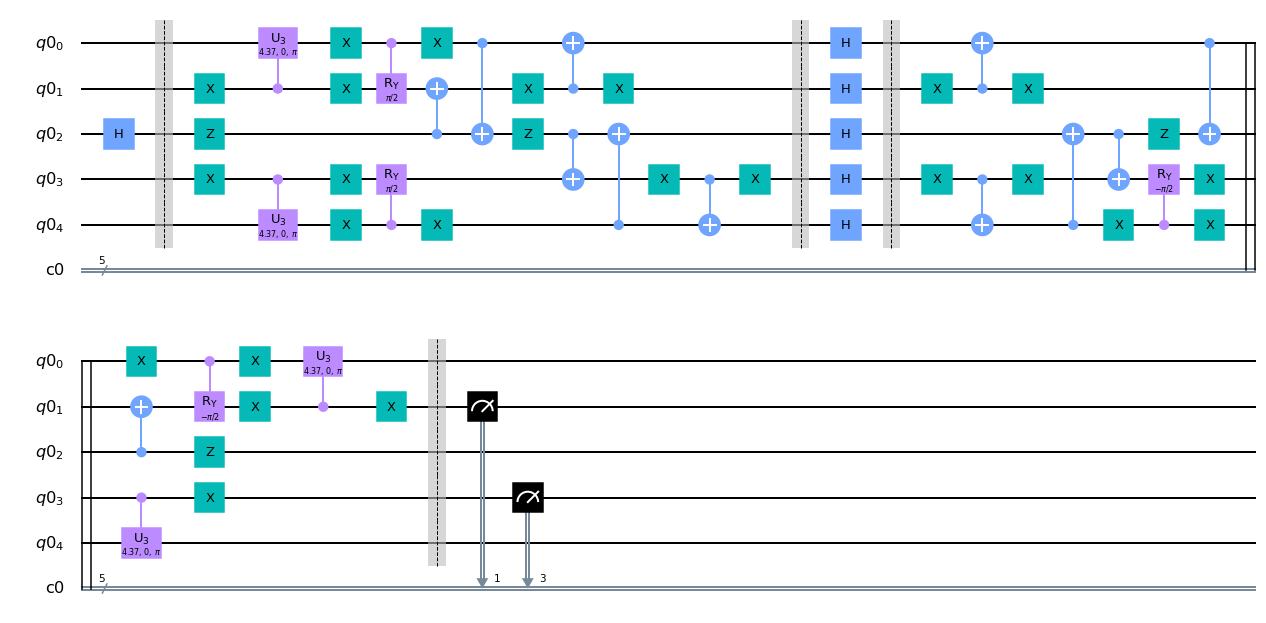

In [15]:
#STANDARD GATES, H Error
qcsh = QuantumCircuit(q, c)

#INITIALIZING ARBITRARY QUBIT
qcsh.h(q[2])
qcsh.barrier()

##STANDARD ENCODING##
qcsh.x(q[1])
qcsh.cu3(np.pi+t+t,0,np.pi,q[1],q[0])
qcsh.x(q[1])
qcsh.x(q[0])
qcsh.cry(np.pi/2,q[0],q[1])
qcsh.x(q[0])
qcsh.z(q[2])
qcsh.cx(q[2],q[1])
qcsh.cx(q[0],q[2])
qcsh.x(q[1])
qcsh.cx(q[1],q[0])
qcsh.x(q[1])

qcsh.x(q[3])
qcsh.cu3(np.pi+t+t,0,np.pi,q[3],q[4])
qcsh.x(q[3])
qcsh.x(q[4])
qcsh.cry(np.pi/2,q[4],q[3])
qcsh.x(q[4])
qcsh.z(q[2])
qcsh.cx(q[2],q[3])
qcsh.cx(q[4],q[2])
qcsh.x(q[3])
qcsh.cx(q[3],q[4])
qcsh.x(q[3])

##error operator##
qcsh.barrier()

qcsh.h(q[0])
qcsh.h(q[1])
qcsh.h(q[2])
qcsh.h(q[3])
qcsh.h(q[4])

qcsh.barrier()

#STANDARD DECODING#

qcsh.x(q[3])
qcsh.cx(q[3],q[4])
qcsh.x(q[3])
qcsh.cx(q[4],q[2])
qcsh.cx(q[2],q[3])
qcsh.z(q[2])
qcsh.x(q[4])
qcsh.cry(-np.pi/2,q[4],q[3])
qcsh.x(q[4])
qcsh.x(q[3])
qcsh.cu3(np.pi+t+t,0,np.pi,q[3],q[4])
qcsh.x(q[3])

qcsh.x(q[1])
qcsh.cx(q[1],q[0])
qcsh.x(q[1])
qcsh.cx(q[0],q[2])
qcsh.cx(q[2],q[1])
qcsh.z(q[2])
qcsh.x(q[0])
qcsh.cry(-np.pi/2,q[0],q[1])
qcsh.x(q[0])
qcsh.x(q[1])
qcsh.cu3(np.pi+t+t,0,np.pi,q[1],q[0])
qcsh.x(q[1])

#measurement
qcsh.barrier()
#qcsh.measure(q[0],c[0])
qcsh.measure(q[1],c[1])
qcsh.measure(q[3],c[3])
#qcsh.measure(q[4],c[4])

qcsh.draw()
qcsh.draw(output="mpl")

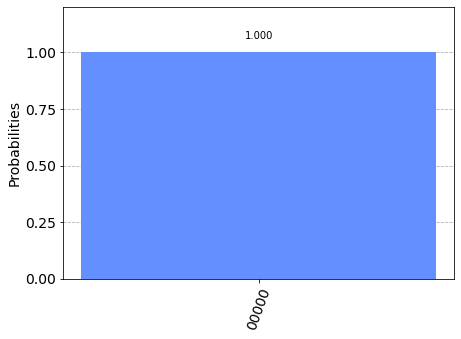

In [16]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
resultshsim = execute(qcsh, backend=simulator).result()
countsshsim = resultshsim.get_counts(qcsh)
plot_histogram(resultshsim.get_counts(qcsh))

In [17]:
#3 Different Runs on Melbourne
machine = provider.get_backend('ibmq_16_melbourne')
jobsh = execute(qcsh, backend=machine, shots=8192)
resultsh = jobsh.result()
countssh=resultsh.get_counts(qcsh)
jobsh2 = execute(qcsh, backend=machine, shots=8192)
resultsh2 = jobsh2.result()
countssh2=resultsh2.get_counts(qcsh)
jobsh3 = execute(qcsh, backend=machine, shots=8192)
resultsh3 = jobsh3.result()
countssh3=resultsh3.get_counts(qcsh)

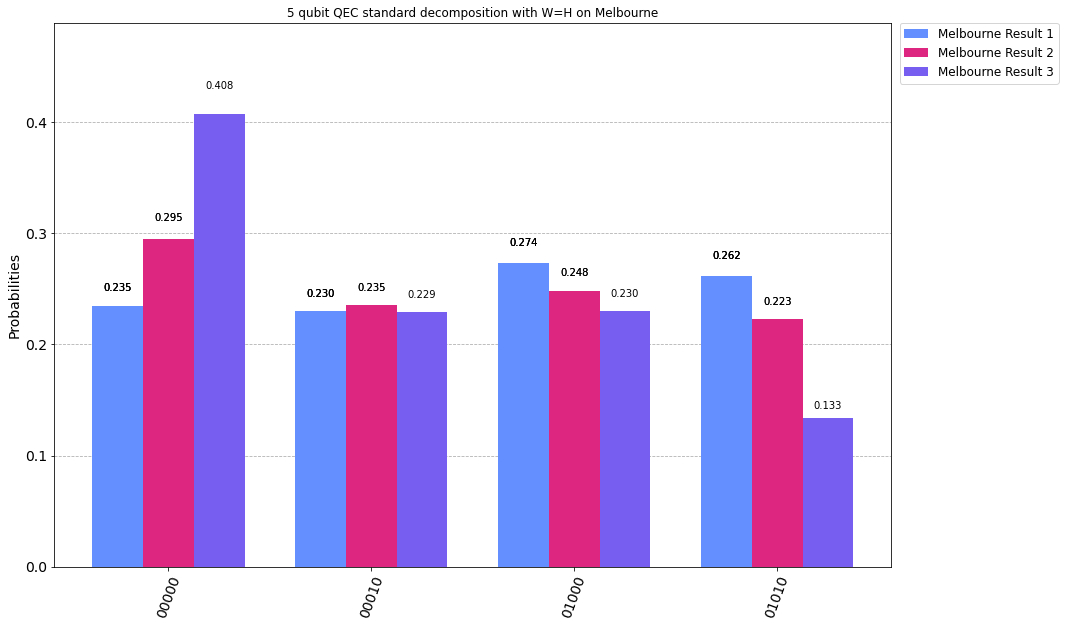

In [18]:
legend=['Melbourne Result 1','Melbourne Result 2', 'Melbourne Result 3']
plot_histogram([countssh, countssh2, countssh3], legend=legend,title='5 qubit QEC standard decomposition with W=H on Melbourne',figsize=(15,10))

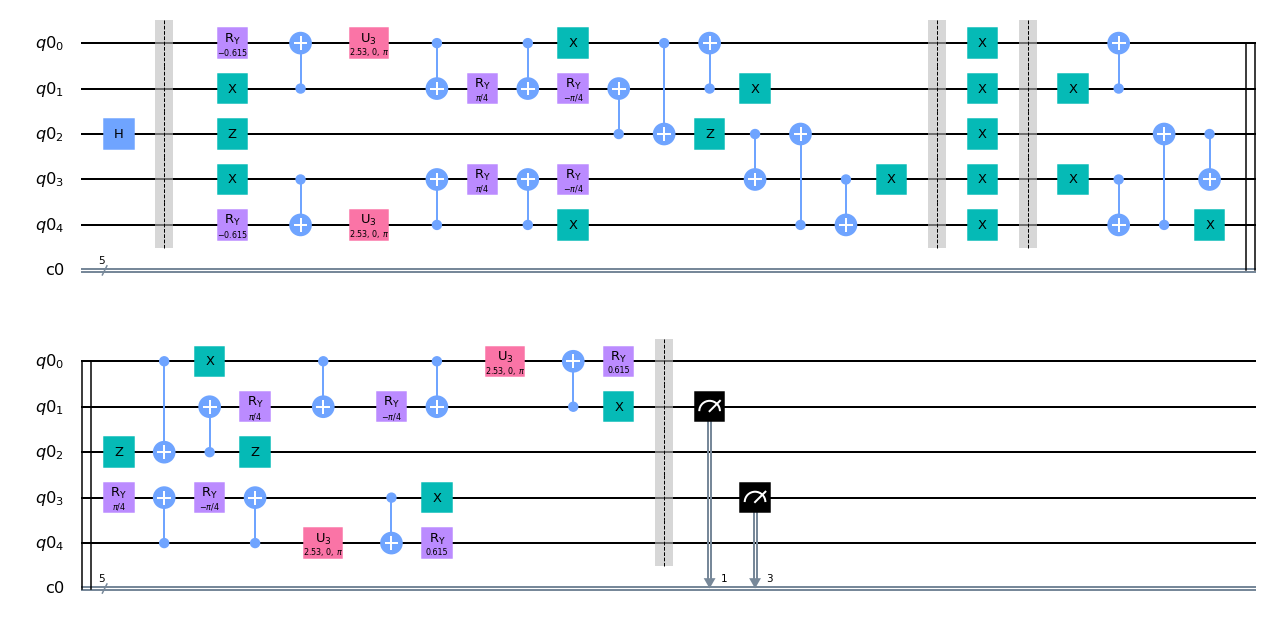

In [19]:
#BASIC GATES, X Error

#Init Circuit
qcbx = QuantumCircuit(q, c)

#INITIALIZING ARBITRARY QUBIT
qcbx.h(q[2])
qcbx.barrier()

#BASIC ENCODING#
qcbx.ry(-t,q[0])
qcbx.x(q[1])
qcbx.cx(q[1], q[0])
qcbx.u3(b,0,np.pi,q[0])
qcbx.cx(q[0],q[1])
qcbx.ry(a,q[1])
qcbx.cx(q[0],q[1])
qcbx.x(q[0])
qcbx.ry(-a,q[1])
qcbx.z(q[2])
qcbx.cx(q[2],q[1])
qcbx.cx(q[0],q[2])
qcbx.cx(q[1],q[0])
qcbx.x(q[1])

qcbx.ry(-t,q[4]) 
qcbx.x(q[3])
qcbx.cx(q[3], q[4])
qcbx.u3(b,0,np.pi,q[4])
qcbx.cx(q[4],q[3])
qcbx.ry(a,q[3])
qcbx.cx(q[4],q[3])
qcbx.x(q[4])
qcbx.ry(-a,q[3])
qcbx.z(q[2])
qcbx.cx(q[2],q[3])
qcbx.cx(q[4],q[2])
qcbx.cx(q[3],q[4])
qcbx.x(q[3])

##error operator##
qcbx.barrier()

qcbx.x(q[0])
qcbx.x(q[1])
qcbx.x(q[2])
qcbx.x(q[3])
qcbx.x(q[4])

qcbx.barrier()

#BASIC DECODING#
qcbx.x(q[3])
qcbx.cx(q[3],q[4])
qcbx.cx(q[4],q[2])
qcbx.cx(q[2],q[3])
qcbx.z(q[2])
qcbx.ry(a,q[3])
qcbx.x(q[4])
qcbx.cx(q[4],q[3])
qcbx.ry(-a,q[3])
qcbx.cx(q[4],q[3])
qcbx.u3(b,0,np.pi,q[4])
qcbx.cx(q[3], q[4])
qcbx.x(q[3])
qcbx.ry(t,q[4])

qcbx.x(q[1])
qcbx.cx(q[1],q[0])
qcbx.cx(q[0],q[2])
qcbx.cx(q[2],q[1])
qcbx.z(q[2])
qcbx.ry(a,q[1])
qcbx.x(q[0])
qcbx.cx(q[0],q[1])
qcbx.ry(-a,q[1])
qcbx.cx(q[0],q[1])
qcbx.u3(b,0,np.pi,q[0])
qcbx.cx(q[1], q[0])
qcbx.x(q[1])
qcbx.ry(t,q[0])

#measurement
qcbx.barrier()
#qcbx.measure(q[0],c[0])
qcbx.measure(q[1],c[1])
qcbx.measure(q[3],c[3])
#qcbx.measure(q[4],c[4])

qcbx.draw()
qcbx.draw(output="mpl")

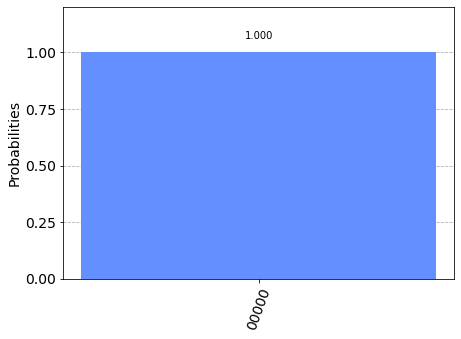

In [20]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
resultbxsim = execute(qcbx, backend=simulator).result()
countsbxsim = resultbxsim.get_counts(qcbx)
plot_histogram(resultbxsim.get_counts(qcbx))

In [21]:
#3 Different Runs on Melbourne
machine = provider.get_backend('ibmq_16_melbourne')
jobbx = execute(qcbx, backend=machine, shots=8192)
resultbx = jobbx.result()
countsbx=resultbx.get_counts(qcbx)
jobbx2 = execute(qcbx, backend=machine, shots=8192)
resultbx2 = jobbx2.result()
countsbx2=resultbx2.get_counts(qcbx)
jobbx3 = execute(qcbx, backend=machine, shots=8192)
resultbx3 = jobbx3.result()
countsbx3=resultbx3.get_counts(qcbx)

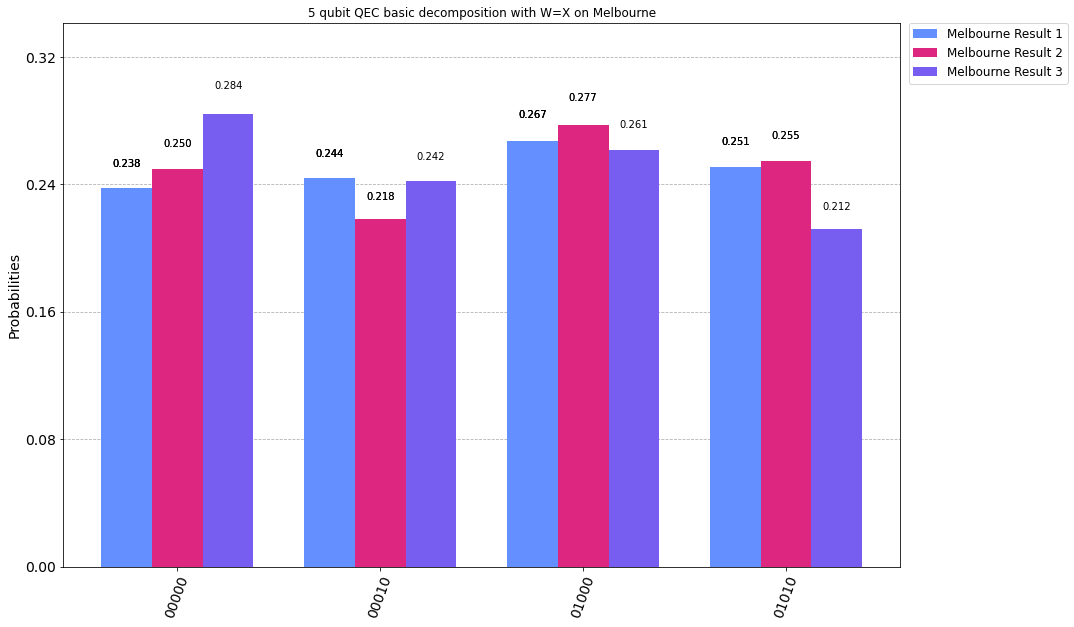

In [22]:
legend=['Melbourne Result 1','Melbourne Result 2', 'Melbourne Result 3']
plot_histogram([countsbx, countsbx2, countsbx3], legend=legend,title='5 qubit QEC basic decomposition with W=X on Melbourne',figsize=(15,10))

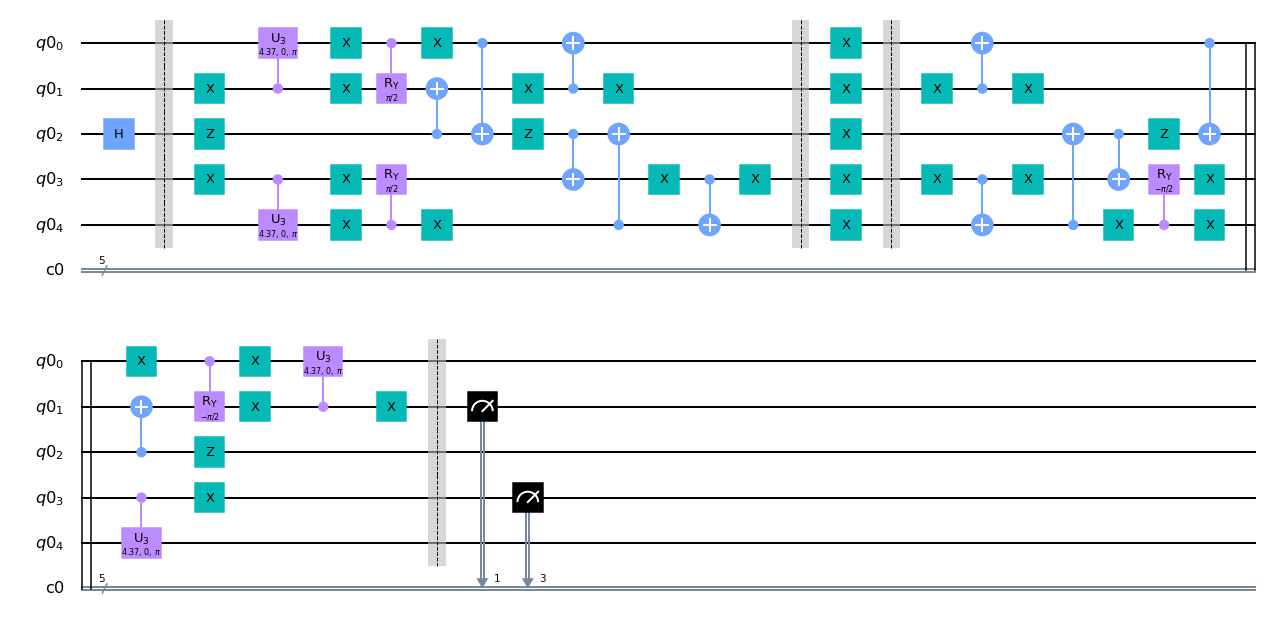

In [23]:
#STANDARD GATES, X Error
qcsx = QuantumCircuit(q, c)

#INITIALIZING ARBITRARY QUBIT
qcsx.h(q[2])
qcsx.barrier()

##STANDARD ENCODING##
qcsx.x(q[1])
qcsx.cu3(np.pi+t+t,0,np.pi,q[1],q[0])
qcsx.x(q[1])
qcsx.x(q[0])
qcsx.cry(np.pi/2,q[0],q[1])
qcsx.x(q[0])
qcsx.z(q[2])
qcsx.cx(q[2],q[1])
qcsx.cx(q[0],q[2])
qcsx.x(q[1])
qcsx.cx(q[1],q[0])
qcsx.x(q[1])

qcsx.x(q[3])
qcsx.cu3(np.pi+t+t,0,np.pi,q[3],q[4])
qcsx.x(q[3])
qcsx.x(q[4])
qcsx.cry(np.pi/2,q[4],q[3])
qcsx.x(q[4])
qcsx.z(q[2])
qcsx.cx(q[2],q[3])
qcsx.cx(q[4],q[2])
qcsx.x(q[3])
qcsx.cx(q[3],q[4])
qcsx.x(q[3])

##error operator##
qcsx.barrier()

qcsx.x(q[0])
qcsx.x(q[1])
qcsx.x(q[2])
qcsx.x(q[3])
qcsx.x(q[4])

qcsx.barrier()

#STANDARD DECODING#

qcsx.x(q[3])
qcsx.cx(q[3],q[4])
qcsx.x(q[3])
qcsx.cx(q[4],q[2])
qcsx.cx(q[2],q[3])
qcsx.z(q[2])
qcsx.x(q[4])
qcsx.cry(-np.pi/2,q[4],q[3])
qcsx.x(q[4])
qcsx.x(q[3])
qcsx.cu3(np.pi+t+t,0,np.pi,q[3],q[4])
qcsx.x(q[3])

qcsx.x(q[1])
qcsx.cx(q[1],q[0])
qcsx.x(q[1])
qcsx.cx(q[0],q[2])
qcsx.cx(q[2],q[1])
qcsx.z(q[2])
qcsx.x(q[0])
qcsx.cry(-np.pi/2,q[0],q[1])
qcsx.x(q[0])
qcsx.x(q[1])
qcsx.cu3(np.pi+t+t,0,np.pi,q[1],q[0])
qcsx.x(q[1])

#measurement
qcsx.barrier()
#qcsx.measure(q[0],c[0])
qcsx.measure(q[1],c[1])
qcsx.measure(q[3],c[3])
#qcsx.measure(q[4],c[4])

qcsx.draw()
qcsx.draw(output="mpl")

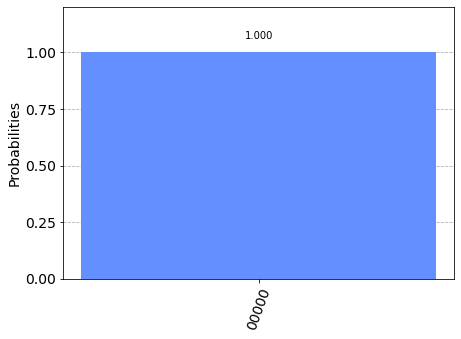

In [24]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
resultsxsim = execute(qcsx, backend=simulator).result()
countssxsim = resultsxsim.get_counts(qcsx)
plot_histogram(resultsxsim.get_counts(qcsx))

In [25]:
#3 Different Runs on Melbourne
machine = provider.get_backend('ibmq_16_melbourne')
jobsx = execute(qcsx, backend=machine, shots=8192)
resultsx = jobsx.result()
countssx=resultsx.get_counts(qcsx)
jobsx2 = execute(qcsx, backend=machine, shots=8192)
resultsx2 = jobsx2.result()
countssx2=resultsx2.get_counts(qcsx)
jobsx3 = execute(qcsx, backend=machine, shots=8192)
resultsx3 = jobsx3.result()
countssx3=resultsx3.get_counts(qcsx)

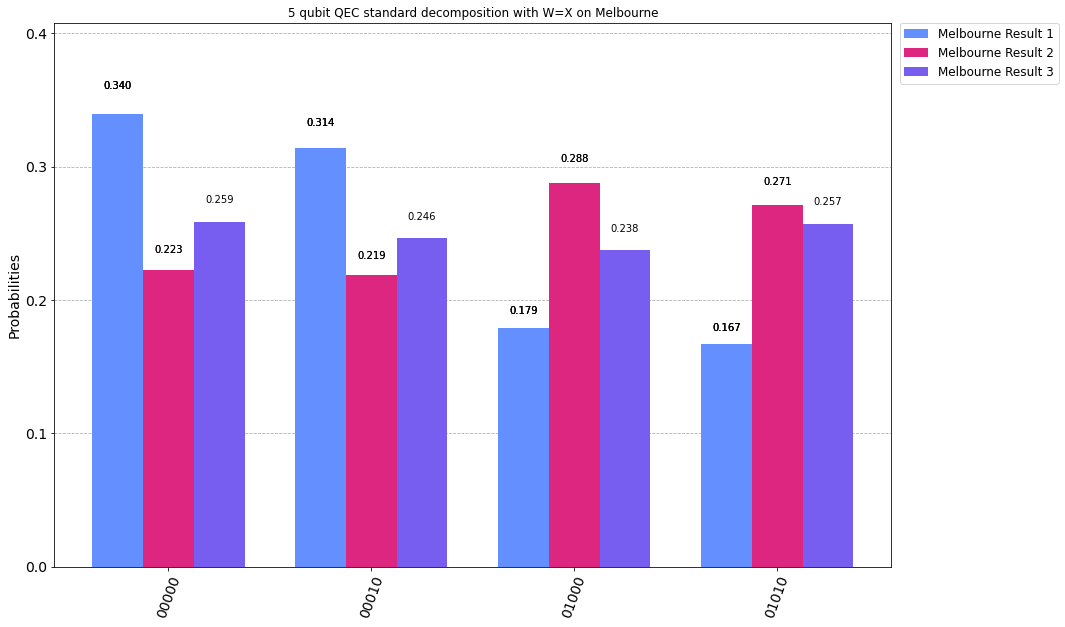

In [26]:
legend=['Melbourne Result 1','Melbourne Result 2', 'Melbourne Result 3']
plot_histogram([countssx, countssx2, countssx3], legend=legend,title='5 qubit QEC standard decomposition with W=X on Melbourne',figsize=(15,10))

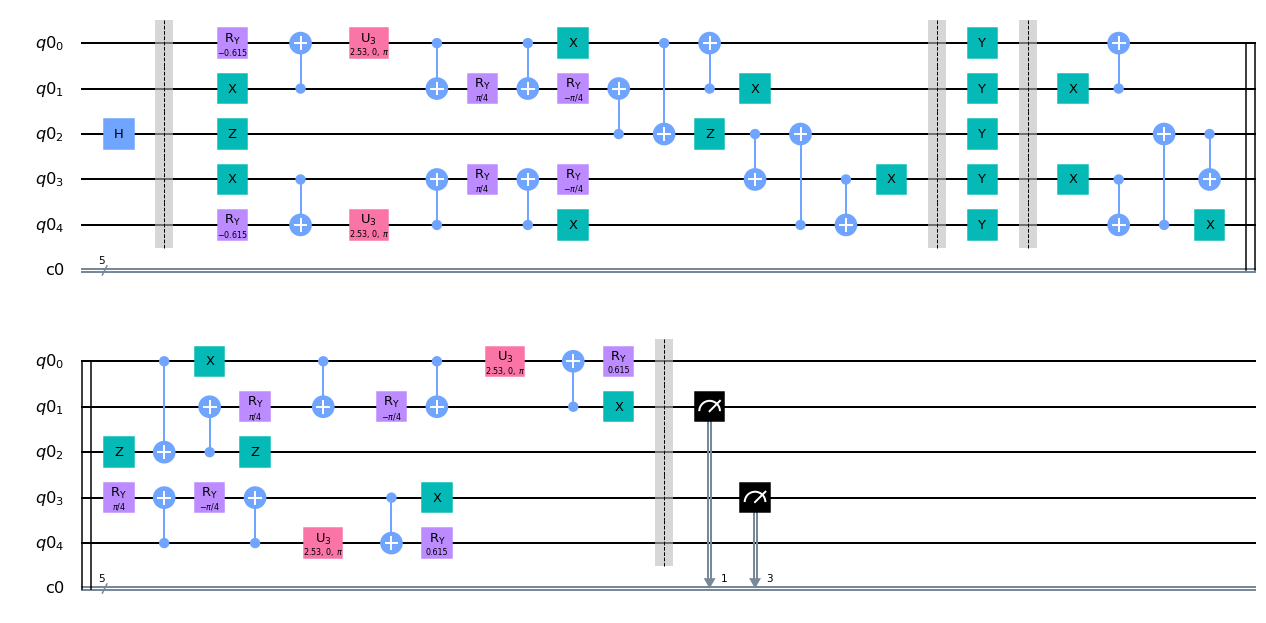

In [27]:
#BASIC GATES, Y Error

#Init Circuit
qcby = QuantumCircuit(q, c)

#INITIALIZING ARBITRARY QUBIT
qcby.h(q[2])
qcby.barrier()

#BASIC ENCODING#
qcby.ry(-t,q[0])
qcby.x(q[1])
qcby.cx(q[1], q[0])
qcby.u3(b,0,np.pi,q[0])
qcby.cx(q[0],q[1])
qcby.ry(a,q[1])
qcby.cx(q[0],q[1])
qcby.x(q[0])
qcby.ry(-a,q[1])
qcby.z(q[2])
qcby.cx(q[2],q[1])
qcby.cx(q[0],q[2])
qcby.cx(q[1],q[0])
qcby.x(q[1])

qcby.ry(-t,q[4]) 
qcby.x(q[3])
qcby.cx(q[3], q[4])
qcby.u3(b,0,np.pi,q[4])
qcby.cx(q[4],q[3])
qcby.ry(a,q[3])
qcby.cx(q[4],q[3])
qcby.x(q[4])
qcby.ry(-a,q[3])
qcby.z(q[2])
qcby.cx(q[2],q[3])
qcby.cx(q[4],q[2])
qcby.cx(q[3],q[4])
qcby.x(q[3])

##error operator##
qcby.barrier()

qcby.y(q[0])
qcby.y(q[1])
qcby.y(q[2])
qcby.y(q[3])
qcby.y(q[4])

qcby.barrier()

#BASIC DECODING#
qcby.x(q[3])
qcby.cx(q[3],q[4])
qcby.cx(q[4],q[2])
qcby.cx(q[2],q[3])
qcby.z(q[2])
qcby.ry(a,q[3])
qcby.x(q[4])
qcby.cx(q[4],q[3])
qcby.ry(-a,q[3])
qcby.cx(q[4],q[3])
qcby.u3(b,0,np.pi,q[4])
qcby.cx(q[3], q[4])
qcby.x(q[3])
qcby.ry(t,q[4])

qcby.x(q[1])
qcby.cx(q[1],q[0])
qcby.cx(q[0],q[2])
qcby.cx(q[2],q[1])
qcby.z(q[2])
qcby.ry(a,q[1])
qcby.x(q[0])
qcby.cx(q[0],q[1])
qcby.ry(-a,q[1])
qcby.cx(q[0],q[1])
qcby.u3(b,0,np.pi,q[0])
qcby.cx(q[1], q[0])
qcby.x(q[1])
qcby.ry(t,q[0])

#measurement
qcby.barrier()
#qcby.measure(q[0],c[0])
qcby.measure(q[1],c[1])
qcby.measure(q[3],c[3])
#qcby.measure(q[4],c[4])

qcby.draw()
qcby.draw(output="mpl")

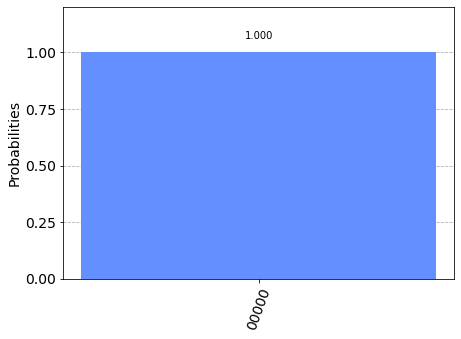

In [28]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
resultbysim = execute(qcby, backend=simulator).result()
countsbysim = resultbysim.get_counts(qcby)
plot_histogram(resultbysim.get_counts(qcby))

In [29]:
#3 Different Runs on Melbourne
machine = provider.get_backend('ibmq_16_melbourne')
jobby = execute(qcby, backend=machine, shots=8192)
resultby = jobby.result()
countsby=resultby.get_counts(qcby)
jobby2 = execute(qcby, backend=machine, shots=8192)
resultby2 = jobby2.result()
countsby2=resultby2.get_counts(qcby)
jobby3 = execute(qcby, backend=machine, shots=8192)
resultby3 = jobby3.result()
countsby3=resultby3.get_counts(qcby)

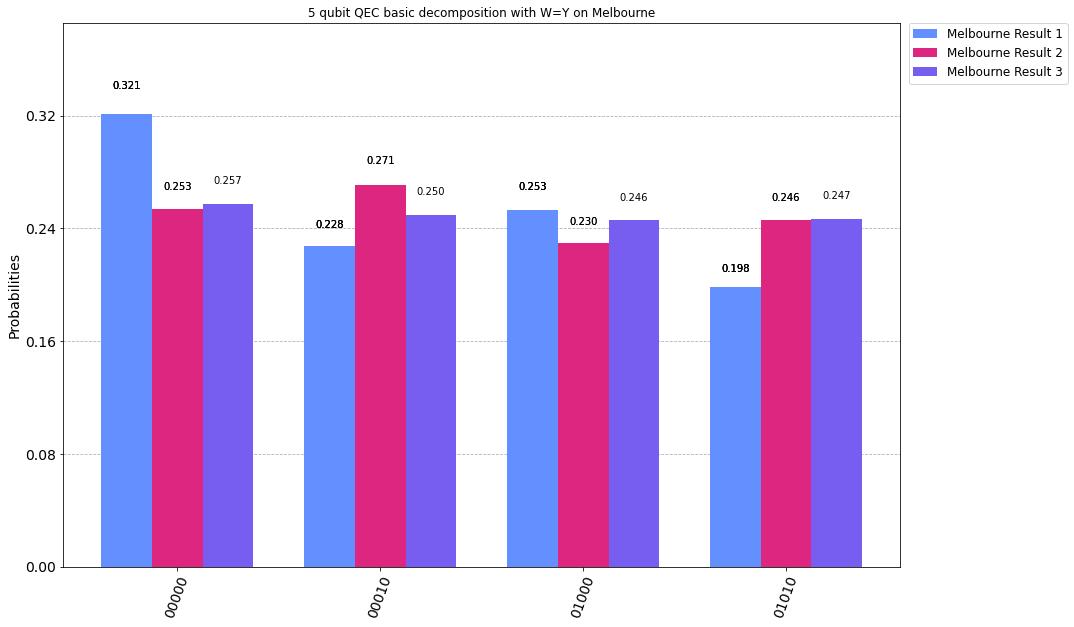

In [30]:
legend=['Melbourne Result 1','Melbourne Result 2', 'Melbourne Result 3']
plot_histogram([countsby, countsby2, countsby3], legend=legend,title='5 qubit QEC basic decomposition with W=Y on Melbourne',figsize=(15,10))

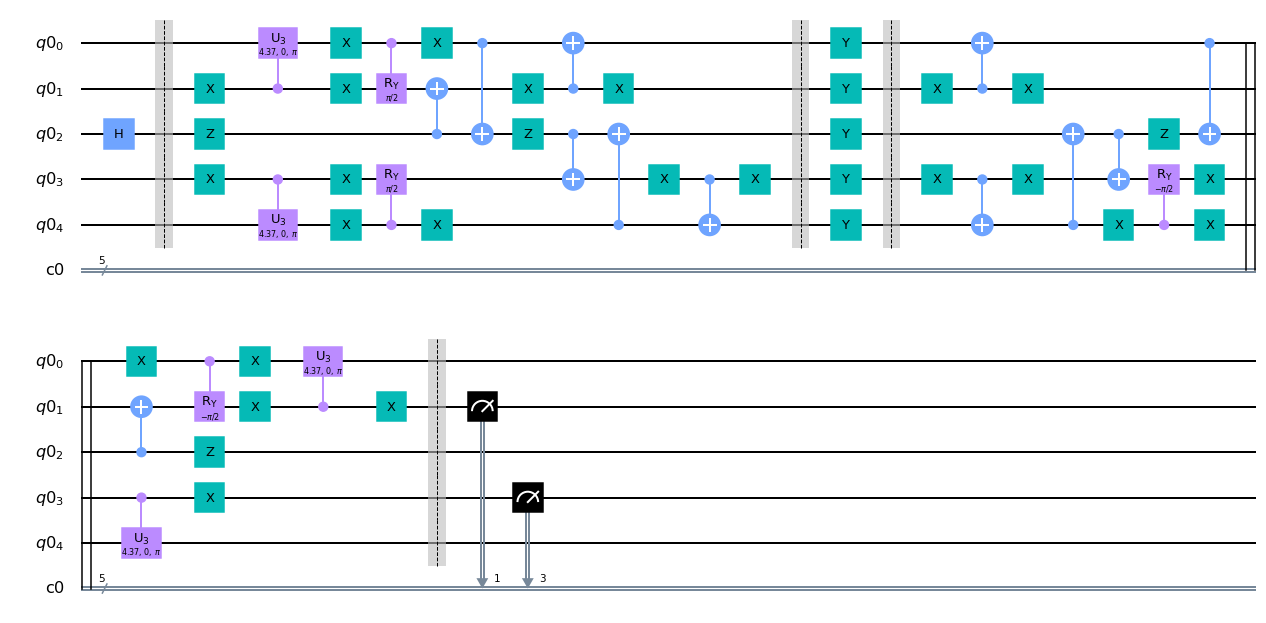

In [31]:
#STANDARD GATES, Y Error
qcsy = QuantumCircuit(q, c)

#INITIALIZING ARBITRARY QUBIT
qcsy.h(q[2])
qcsy.barrier()

##STANDARD ENCODING##
qcsy.x(q[1])
qcsy.cu3(np.pi+t+t,0,np.pi,q[1],q[0])
qcsy.x(q[1])
qcsy.x(q[0])
qcsy.cry(np.pi/2,q[0],q[1])
qcsy.x(q[0])
qcsy.z(q[2])
qcsy.cx(q[2],q[1])
qcsy.cx(q[0],q[2])
qcsy.x(q[1])
qcsy.cx(q[1],q[0])
qcsy.x(q[1])

qcsy.x(q[3])
qcsy.cu3(np.pi+t+t,0,np.pi,q[3],q[4])
qcsy.x(q[3])
qcsy.x(q[4])
qcsy.cry(np.pi/2,q[4],q[3])
qcsy.x(q[4])
qcsy.z(q[2])
qcsy.cx(q[2],q[3])
qcsy.cx(q[4],q[2])
qcsy.x(q[3])
qcsy.cx(q[3],q[4])
qcsy.x(q[3])

##error operator##
qcsy.barrier()

qcsy.y(q[0])
qcsy.y(q[1])
qcsy.y(q[2])
qcsy.y(q[3])
qcsy.y(q[4])

qcsy.barrier()

#STANDARD DECODING#

qcsy.x(q[3])
qcsy.cx(q[3],q[4])
qcsy.x(q[3])
qcsy.cx(q[4],q[2])
qcsy.cx(q[2],q[3])
qcsy.z(q[2])
qcsy.x(q[4])
qcsy.cry(-np.pi/2,q[4],q[3])
qcsy.x(q[4])
qcsy.x(q[3])
qcsy.cu3(np.pi+t+t,0,np.pi,q[3],q[4])
qcsy.x(q[3])

qcsy.x(q[1])
qcsy.cx(q[1],q[0])
qcsy.x(q[1])
qcsy.cx(q[0],q[2])
qcsy.cx(q[2],q[1])
qcsy.z(q[2])
qcsy.x(q[0])
qcsy.cry(-np.pi/2,q[0],q[1])
qcsy.x(q[0])
qcsy.x(q[1])
qcsy.cu3(np.pi+t+t,0,np.pi,q[1],q[0])
qcsy.x(q[1])

#measurement
qcsy.barrier()
#qcsy.measure(q[0],c[0])
qcsy.measure(q[1],c[1])
qcsy.measure(q[3],c[3])
#qcsy.measure(q[4],c[4])

qcsy.draw()
qcsy.draw(output="mpl")

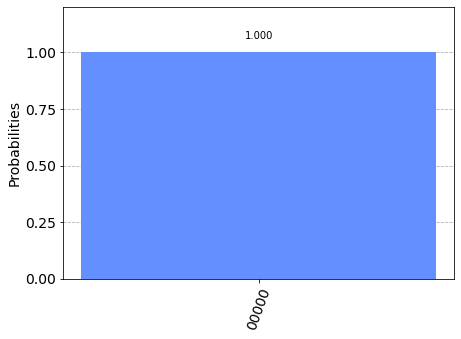

In [32]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
resultsysim = execute(qcsy, backend=simulator).result()
countssysim = resultsysim.get_counts(qcsy)
plot_histogram(resultsysim.get_counts(qcsy))

In [33]:
#3 Different Runs on Melbourne
machine = provider.get_backend('ibmq_16_melbourne')
jobsy = execute(qcsy, backend=machine, shots=8192)
resultsy = jobsy.result()
countssy=resultsy.get_counts(qcsy)
jobsy2 = execute(qcsy, backend=machine, shots=8192)
resultsy2 = jobsy2.result()
countssy2=resultsy2.get_counts(qcsy)
jobsy3 = execute(qcsy, backend=machine, shots=8192)
resultsy3 = jobsy3.result()
countssy3=resultsy3.get_counts(qcsy)

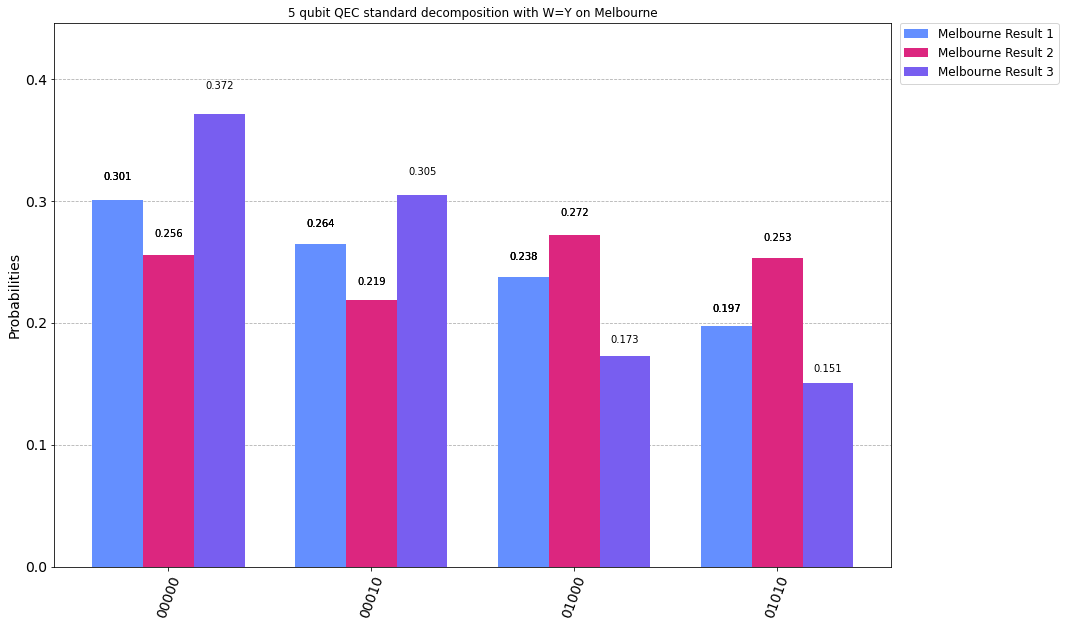

In [34]:
legend=['Melbourne Result 1','Melbourne Result 2', 'Melbourne Result 3']
plot_histogram([countssy, countssy2, countssy3], legend=legend,title='5 qubit QEC standard decomposition with W=Y on Melbourne',figsize=(15,10))

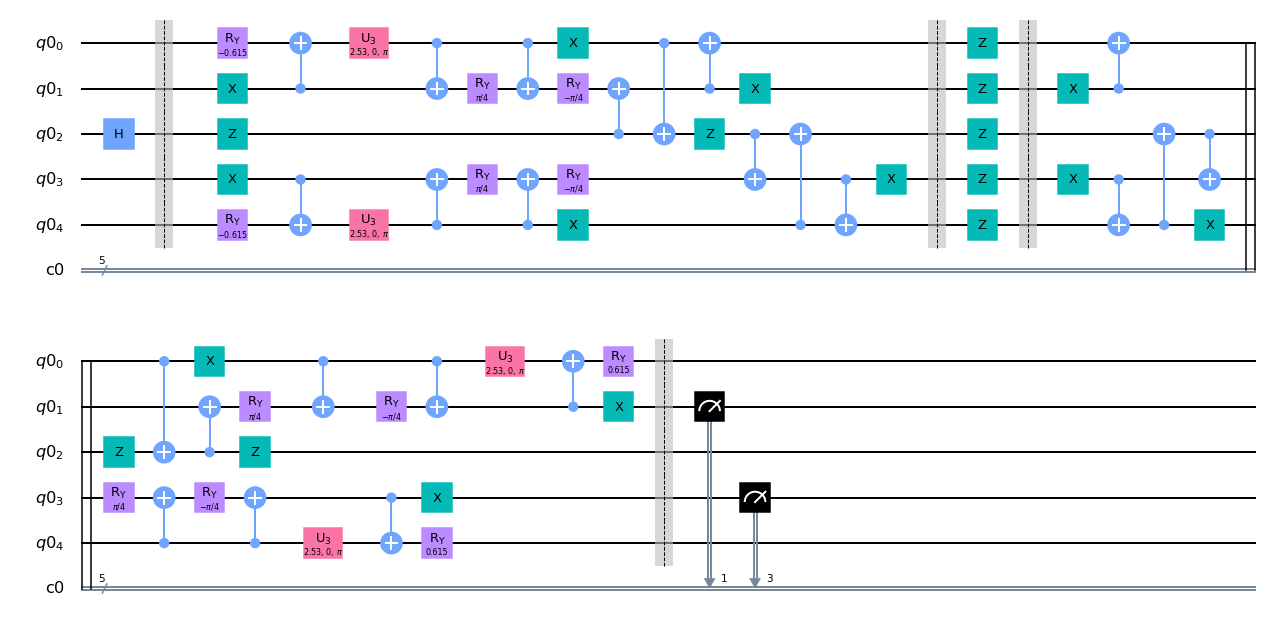

In [35]:
#BASIC GATES, Z Error

#Init Circuit
qcbz = QuantumCircuit(q, c)

#INITIALIZING ARBITRARY QUBIT
qcbz.h(q[2])
qcbz.barrier()

#BASIC ENCODING#
qcbz.ry(-t,q[0])
qcbz.x(q[1])
qcbz.cx(q[1], q[0])
qcbz.u3(b,0,np.pi,q[0])
qcbz.cx(q[0],q[1])
qcbz.ry(a,q[1])
qcbz.cx(q[0],q[1])
qcbz.x(q[0])
qcbz.ry(-a,q[1])
qcbz.z(q[2])
qcbz.cx(q[2],q[1])
qcbz.cx(q[0],q[2])
qcbz.cx(q[1],q[0])
qcbz.x(q[1])

qcbz.ry(-t,q[4]) 
qcbz.x(q[3])
qcbz.cx(q[3], q[4])
qcbz.u3(b,0,np.pi,q[4])
qcbz.cx(q[4],q[3])
qcbz.ry(a,q[3])
qcbz.cx(q[4],q[3])
qcbz.x(q[4])
qcbz.ry(-a,q[3])
qcbz.z(q[2])
qcbz.cx(q[2],q[3])
qcbz.cx(q[4],q[2])
qcbz.cx(q[3],q[4])
qcbz.x(q[3])

##error operator##
qcbz.barrier()

qcbz.z(q[0])
qcbz.z(q[1])
qcbz.z(q[2])
qcbz.z(q[3])
qcbz.z(q[4])

qcbz.barrier()

#BASIC DECODING#
qcbz.x(q[3])
qcbz.cx(q[3],q[4])
qcbz.cx(q[4],q[2])
qcbz.cx(q[2],q[3])
qcbz.z(q[2])
qcbz.ry(a,q[3])
qcbz.x(q[4])
qcbz.cx(q[4],q[3])
qcbz.ry(-a,q[3])
qcbz.cx(q[4],q[3])
qcbz.u3(b,0,np.pi,q[4])
qcbz.cx(q[3], q[4])
qcbz.x(q[3])
qcbz.ry(t,q[4])

qcbz.x(q[1])
qcbz.cx(q[1],q[0])
qcbz.cx(q[0],q[2])
qcbz.cx(q[2],q[1])
qcbz.z(q[2])
qcbz.ry(a,q[1])
qcbz.x(q[0])
qcbz.cx(q[0],q[1])
qcbz.ry(-a,q[1])
qcbz.cx(q[0],q[1])
qcbz.u3(b,0,np.pi,q[0])
qcbz.cx(q[1], q[0])
qcbz.x(q[1])
qcbz.ry(t,q[0])

#measurement
qcbz.barrier()
#qcbz.measure(q[0],c[0])
qcbz.measure(q[1],c[1])
qcbz.measure(q[3],c[3])
#qcbz.measure(q[4],c[4])

qcbz.draw()
qcbz.draw(output="mpl")

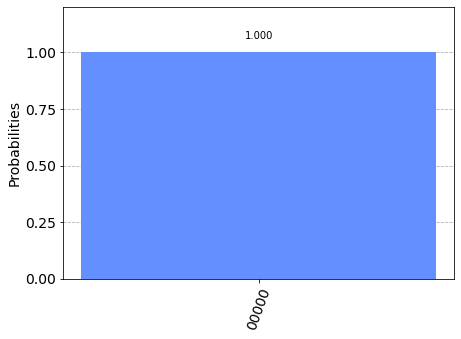

In [36]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
resultbzsim = execute(qcbz, backend=simulator).result()
countsbzsim = resultbzsim.get_counts(qcbz)
plot_histogram(resultbzsim.get_counts(qcbz))

In [37]:
#3 Different Runs on Melbourne
machine = provider.get_backend('ibmq_16_melbourne')
jobbz = execute(qcbz, backend=machine, shots=8192)
resultbz = jobbz.result()
countsbz=resultbz.get_counts(qcbz)
jobbz2 = execute(qcbz, backend=machine, shots=8192)
resultbz2 = jobbz2.result()
countsbz2=resultbz2.get_counts(qcbz)
jobbz3 = execute(qcbz, backend=machine, shots=8192)
resultbz3 = jobbz3.result()
countsbz3=resultbz3.get_counts(qcbz)

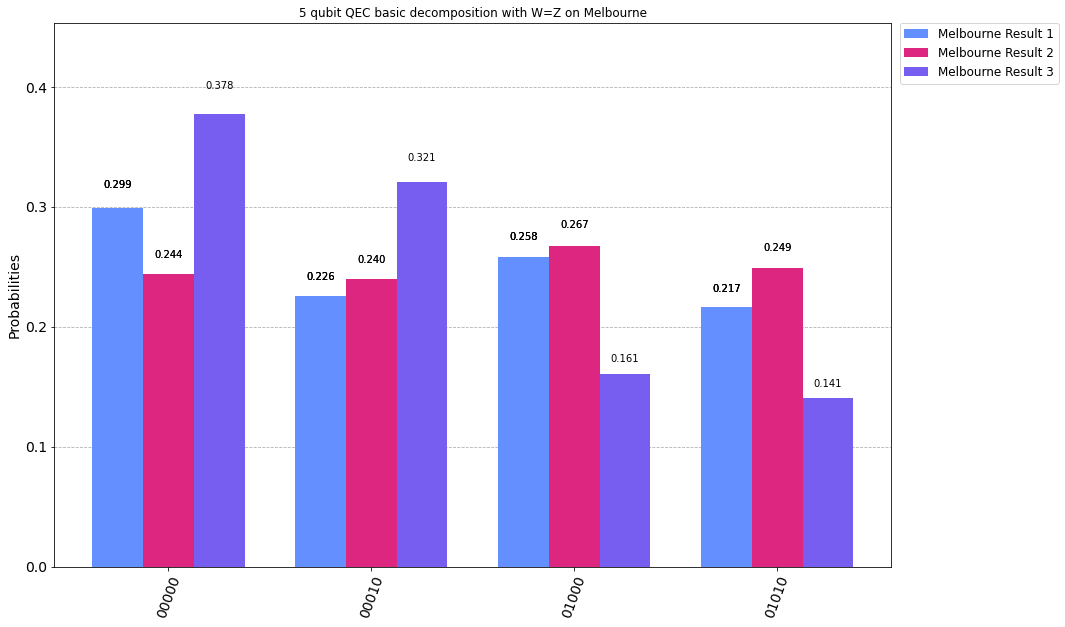

In [38]:
legend=['Melbourne Result 1','Melbourne Result 2', 'Melbourne Result 3']
plot_histogram([countsbz, countsbz2, countsbz3], legend=legend,title='5 qubit QEC basic decomposition with W=Z on Melbourne',figsize=(15,10))

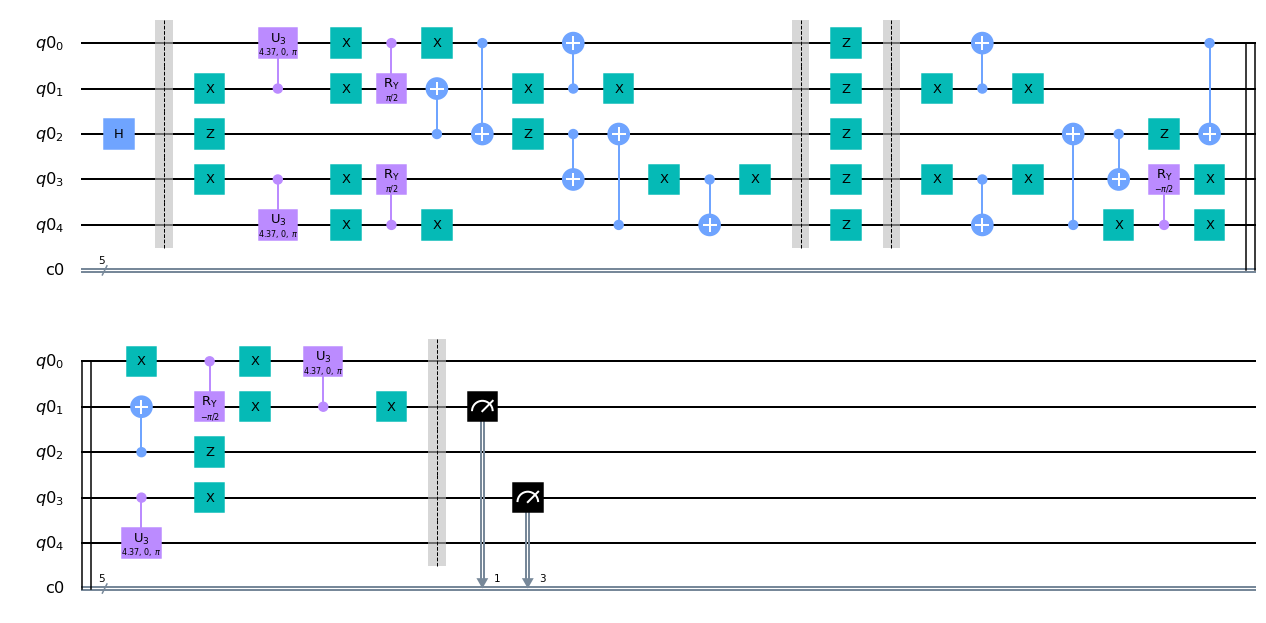

In [39]:
#STANDARD GATES, Z Error
qcsz = QuantumCircuit(q, c)

#INITIALIZING ARBITRARY QUBIT
qcsz.h(q[2])
qcsz.barrier()

##STANDARD ENCODING##
qcsz.x(q[1])
qcsz.cu3(np.pi+t+t,0,np.pi,q[1],q[0])
qcsz.x(q[1])
qcsz.x(q[0])
qcsz.cry(np.pi/2,q[0],q[1])
qcsz.x(q[0])
qcsz.z(q[2])
qcsz.cx(q[2],q[1])
qcsz.cx(q[0],q[2])
qcsz.x(q[1])
qcsz.cx(q[1],q[0])
qcsz.x(q[1])

qcsz.x(q[3])
qcsz.cu3(np.pi+t+t,0,np.pi,q[3],q[4])
qcsz.x(q[3])
qcsz.x(q[4])
qcsz.cry(np.pi/2,q[4],q[3])
qcsz.x(q[4])
qcsz.z(q[2])
qcsz.cx(q[2],q[3])
qcsz.cx(q[4],q[2])
qcsz.x(q[3])
qcsz.cx(q[3],q[4])
qcsz.x(q[3])

##error operator##
qcsz.barrier()

qcsz.z(q[0])
qcsz.z(q[1])
qcsz.z(q[2])
qcsz.z(q[3])
qcsz.z(q[4])

qcsz.barrier()

#STANDARD DECODING#

qcsz.x(q[3])
qcsz.cx(q[3],q[4])
qcsz.x(q[3])
qcsz.cx(q[4],q[2])
qcsz.cx(q[2],q[3])
qcsz.z(q[2])
qcsz.x(q[4])
qcsz.cry(-np.pi/2,q[4],q[3])
qcsz.x(q[4])
qcsz.x(q[3])
qcsz.cu3(np.pi+t+t,0,np.pi,q[3],q[4])
qcsz.x(q[3])

qcsz.x(q[1])
qcsz.cx(q[1],q[0])
qcsz.x(q[1])
qcsz.cx(q[0],q[2])
qcsz.cx(q[2],q[1])
qcsz.z(q[2])
qcsz.x(q[0])
qcsz.cry(-np.pi/2,q[0],q[1])
qcsz.x(q[0])
qcsz.x(q[1])
qcsz.cu3(np.pi+t+t,0,np.pi,q[1],q[0])
qcsz.x(q[1])

#measurement
qcsz.barrier()
#qcsz.measure(q[0],c[0])
qcsz.measure(q[1],c[1])
qcsz.measure(q[3],c[3])
#qcsz.measure(q[4],c[4])

qcsz.draw()
qcsz.draw(output="mpl")

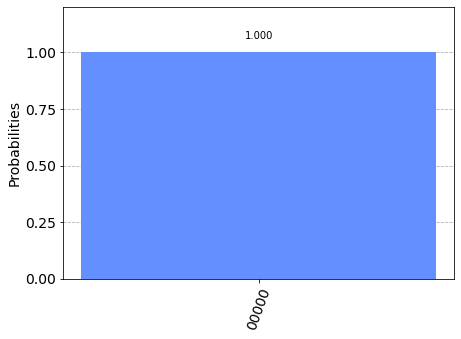

In [40]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
resultszsim = execute(qcsz, backend=simulator).result()
countsszsim = resultszsim.get_counts(qcsz)
plot_histogram(resultszsim.get_counts(qcsz))

In [41]:
#3 Different Runs on Melbourne
machine = provider.get_backend('ibmq_16_melbourne')
jobsz = execute(qcsz, backend=machine, shots=8192)
resultsz = jobsz.result()
countssz=resultsz.get_counts(qcsz)
jobsz2 = execute(qcsz, backend=machine, shots=8192)
resultsz2 = jobsz2.result()
countssz2=resultsz2.get_counts(qcsz)
jobsz3 = execute(qcsz, backend=machine, shots=8192)
resultsz3 = jobsz3.result()
countssz3=resultsz3.get_counts(qcsz)

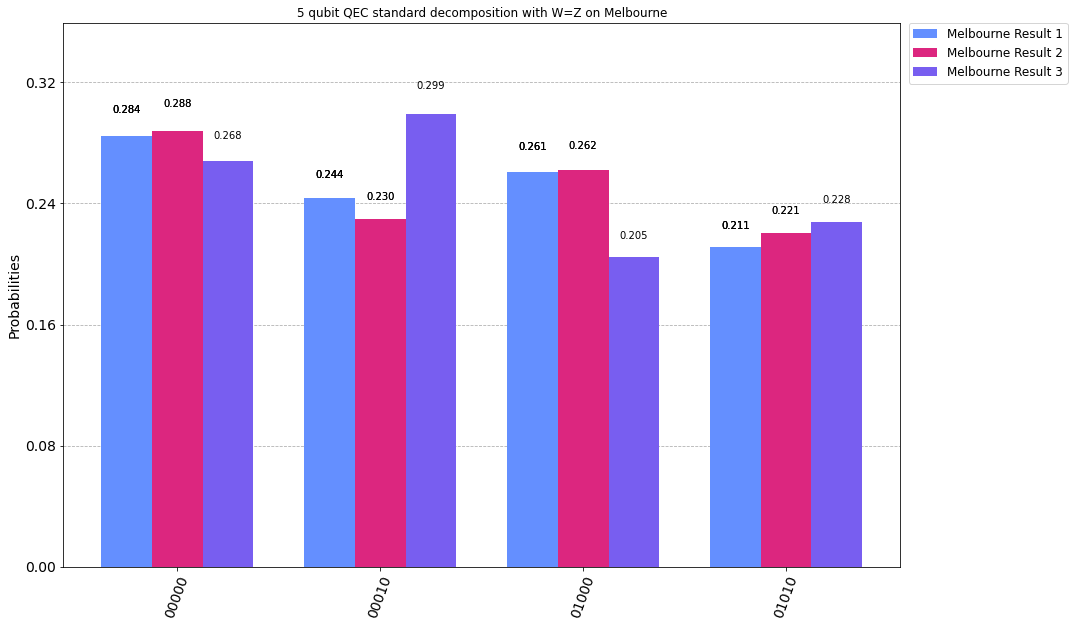

In [42]:
legend=['Melbourne Result 1','Melbourne Result 2', 'Melbourne Result 3']
plot_histogram([countssz, countssz2, countssz3], legend=legend,title='5 qubit QEC standard decomposition with W=Z on Melbourne',figsize=(15,10))